In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [56]:
df_airPassengers = pd.read_csv('AirPassengers.csv')
df_airPassengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [57]:
df_airPassengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [58]:
df_airPassengers[df_airPassengers['Month'].duplicated()]

,Month,#Passengers


In [59]:
df_airPassengers['Month'] = pd.to_datetime(df_airPassengers['Month'], format="%Y-%m")

In [60]:
df_airPassengers.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<AxesSubplot:>

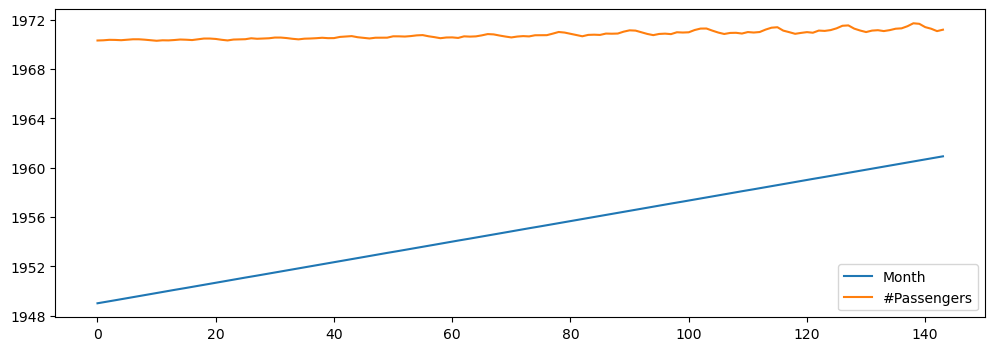

In [61]:
df_airPassengers.plot(figsize=(12,4))

In [62]:
df_airPassengers_ = df_airPassengers.set_index(['Month'])
df_airPassengers_.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [64]:
df_airPassengers_series = df_airPassengers_.squeeze()
df_airPassengers_series.values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

<AxesSubplot:xlabel='Month'>

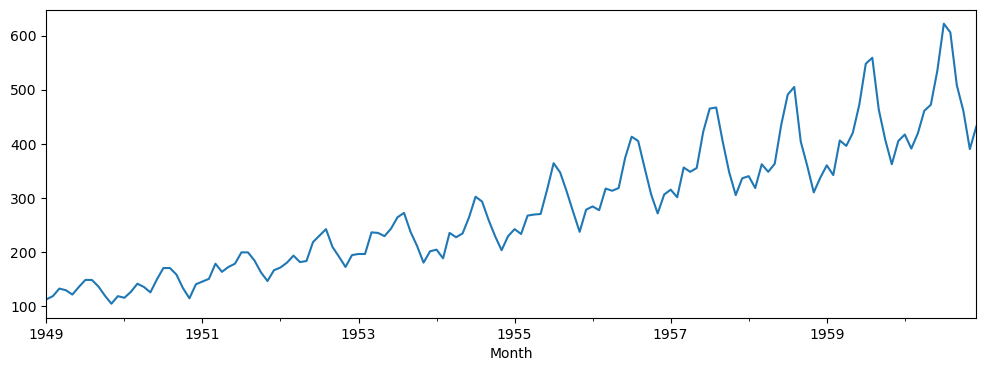

In [65]:
df_airPassengers_series.plot(figsize=(12,4))

In [66]:
#print(air_passengers_series.values)
passenger_values = (df_airPassengers_series.values)
#passenger_values
result = adfuller(passenger_values)
print(result)

(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [86]:
from statsmodels.tsa.stattools import adfuller
series = df_airPassengers_series
X_ = np.exp(series.values)
result = adfuller(X_)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

ADF Statistic: nan
p-value: nan
Critical Values:
1% -3.4769274060112707
5% -2.8819726324025625
10% -2.577665408088415


In [87]:
X = np.sqrt(series.values)
X1 = np.exp(X)
result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %f' % (key, value))

ADF Statistic: 22.359205
p-value: 1.000000
	1%: -3.480888
	5%: -2.883697
	10%: -2.578586


<AxesSubplot:>

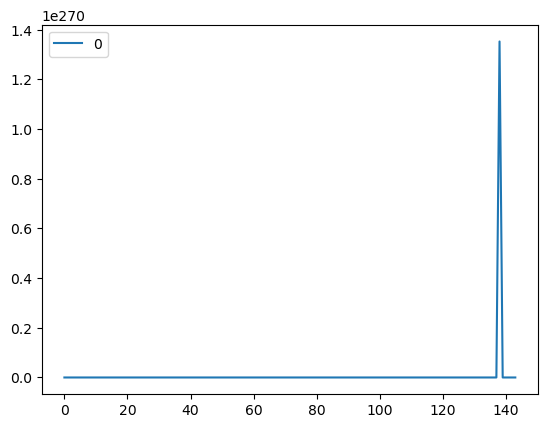

In [88]:
df2 = pd.DataFrame(X_)
df2.plot()

In [84]:
#print(air_passengers_series.values)
df3 = np.sqrt(series_2.values)
#passenger_values
df3 = np.diff(df3)
print(df3)
result3 = adfuller(df3)
print("result0:", result3[0])
print("result4:", result3[4])
if result3[0]>result3[4]['5%']:
    print("not stationary")
else:
    print("Stationary")

[ 0.27977525  0.6263448  -0.1313086  -0.35781669  0.61895004  0.54657502
  0.         -0.50362127 -0.75319168 -0.71067309  0.66474146 -0.1389752
  0.50116687  0.64936993 -0.25539205 -0.43861015  1.02621573  0.83184919
  0.         -0.46859972 -1.0372425  -0.85548434  1.15508131  0.20943501
  0.20585414  1.09421535 -0.57451873  0.34773171  0.22678702  0.76507192
  0.         -0.54207601 -0.8367379  -0.64487609  0.80105275  0.1925981
  0.33971103  0.47603612 -0.43881994  0.07412521  1.2370738   0.40092783
  0.3905983  -1.09951689 -0.63655733 -0.70539791  0.81351123  0.07161172
  0.          1.3622915  -0.03258178 -0.19696377  0.45571132  0.65961954
  0.24434569 -1.09761818 -0.86896527 -1.10943118  0.76103901  0.10540998
 -0.57154766  1.61840052 -0.26319054  0.23053937  0.95101827  1.13007039
 -0.26090443 -1.02376583 -0.96073099 -0.8849391   0.8849391   0.42360324
 -0.29201166  1.07579712  0.06108483  0.03045726  1.31656262  1.33054468
 -0.45084802 -0.96441428 -1.11057638 -1.15814104  1.2

<AxesSubplot:>

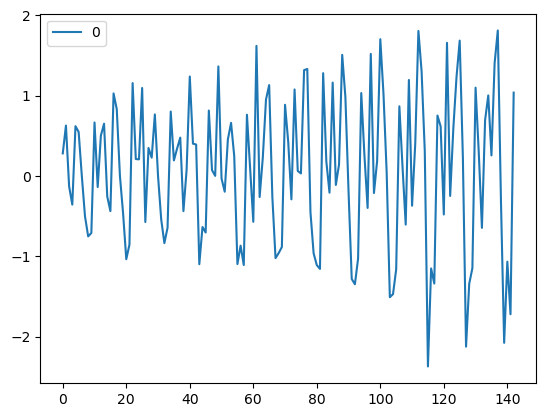

In [85]:
df3 = pd.DataFrame(df3)
df3.plot()

### AR Model

In [48]:
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import math

In [74]:
# get the data
time_series = df_airPassengers_['#Passengers'].values

In [89]:
# Split the data into training and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[0:train_size], time_series[train_size:]

In [90]:
res = AutoReg(time_series, lags=1, seasonal=True, period=11).fit()
# print(out.format(res.aic, res.hqic, res.bic))

In [91]:
# Make predictions using the test data
predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [92]:
# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 48.652


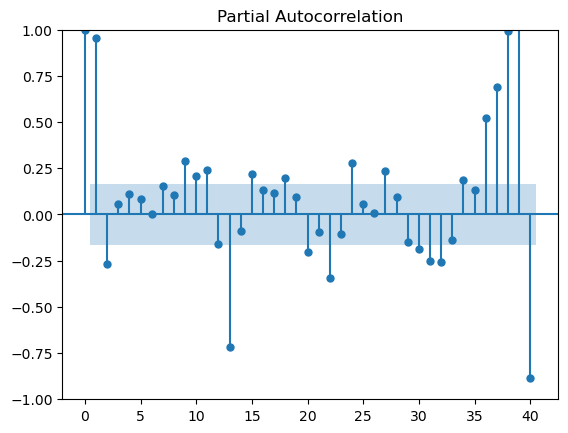

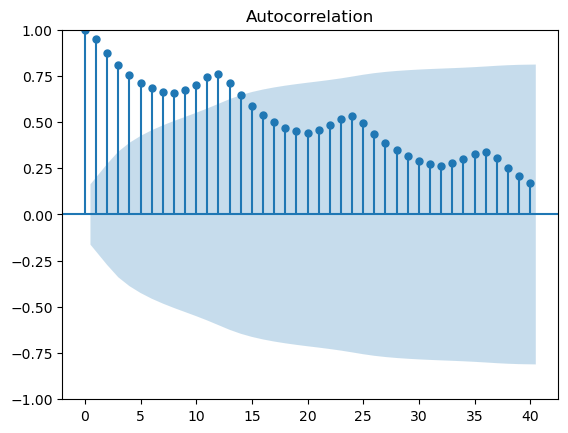

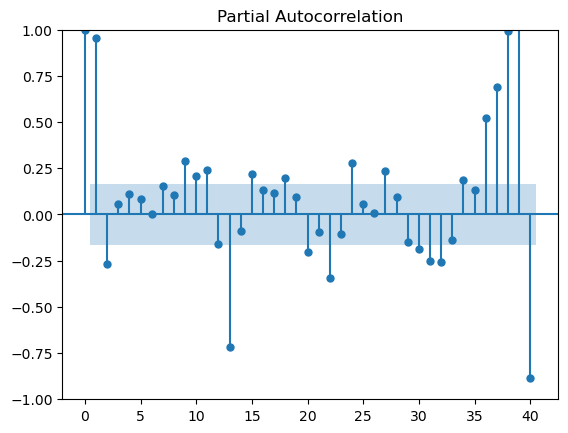

In [93]:
sm.graphics.tsa.plot_acf(time_series, lags=40)
sm.graphics.tsa.plot_pacf(time_series, lags=40)